In [1]:
# Попробуем построить модель только для легковых ТС, которыми владеют физлица

import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing
from tqdm import tqdm
tqdm.pandas(desc="")

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
dt = pd.read_csv('../data/primary.csv')

In [3]:
dt.head()

,Unnamed: 0,AGR_ISN,AGR_DATESIGN,AGR_DATEBEG,AGR_DATEEND,AGR_SRC,AGR_CREATEDBY,INS_ISN,INS_NAME,INS_SEX,...,SUM_CLAIM_PAY,CNT_PVU_NOT_PAY,CNT_PVU_PAY,SUM_PVU_NOT_PAY,SUM_PVU_PAY,COURT_EXISTS,COURT_AMOUNT,INS_ANTI_VIP,OWN_ANTI_VIP,DRV_ANTI_VIP
0,0,885994559,23.01.15,25.01.15,24.01.16,КИАС:Страхование,Алексеева Юлия Андреевна,157040000,"НПО ""Спецремэнерго""",NaN,...,NaN,0,0,NaN,NaN,0,NaN,0,0,NaN
1,1,886049726,13.02.15,16.02.15,15.02.16,КИАС:Страхование,Карабегович Алла Викторовна,126439000,Корендясев Алексей Юрьевич,М,...,NaN,0,0,NaN,NaN,0,NaN,0,0,"0,0,0"
2,2,886482027,25.09.15,30.09.15,29.09.16,КИАС:Страхование,Карабегович Алла Викторовна,157142000,Гребнева Галина Ивановна,Ж,...,NaN,0,0,NaN,NaN,0,NaN,0,0,"0,0,0,0,0"
3,3,886618143,25.09.15,30.09.15,29.09.16,КИАС:Страхование,Попов Алексей Сергеевич,157142000,Гребнева Галина Ивановна,Ж,...,NaN,0,0,NaN,NaN,0,NaN,0,0,"0,0,0,0"
4,4,886683292,10.02.16,16.02.16,15.02.17,КИАС:Страхование,Карабегович Алла Викторовна,126439000,Корендясев Алексей Юрьевич,М,...,NaN,0,0,NaN,NaN,0,NaN,0,0,"0,0,0,0"


In [12]:
dt.OWN_JUR.value_counts()

0    89042
1    18039
Name: OWN_JUR, dtype: int64

In [25]:
dt = dt[(dt['TS_TYPE'] == 'Легковые автомобили') 
   & (dt['OWN_JUR'] == 0) 
   & (dt['INS_JUR'] == 0)].drop(['TS_TYPE', 'OWN_JUR', 'INS_JUR'], axis=1).drop(dt.columns[[0]], axis = 1)

dt.head()

,AGR_ISN,AGR_DATESIGN,AGR_DATEBEG,AGR_DATEEND,AGR_SRC,AGR_CREATEDBY,INS_ISN,INS_NAME,INS_SEX,INS_YEAR,...,CNT_PVU_NOT_PAY,CNT_PVU_PAY,SUM_PVU_NOT_PAY,SUM_PVU_PAY,COURT_EXISTS,COURT_AMOUNT,INS_ANTI_VIP,OWN_ANTI_VIP,DRV_ANTI_VIP,f1_daysbeforestart
1,886049726,13.02.15,16.02.15,15.02.16,КИАС:Страхование,Карабегович Алла Викторовна,126439000,Корендясев Алексей Юрьевич,М,49.0,...,0,0,NaN,NaN,0,NaN,0,0,"0,0,0",3
2,886482027,25.09.15,30.09.15,29.09.16,КИАС:Страхование,Карабегович Алла Викторовна,157142000,Гребнева Галина Ивановна,Ж,52.0,...,0,0,NaN,NaN,0,NaN,0,0,"0,0,0,0,0",5
3,886618143,25.09.15,30.09.15,29.09.16,КИАС:Страхование,Попов Алексей Сергеевич,157142000,Гребнева Галина Ивановна,Ж,52.0,...,0,0,NaN,NaN,0,NaN,0,0,"0,0,0,0",5
4,886683292,10.02.16,16.02.16,15.02.17,КИАС:Страхование,Карабегович Алла Викторовна,126439000,Корендясев Алексей Юрьевич,М,50.0,...,0,0,NaN,NaN,0,NaN,0,0,"0,0,0,0",6
5,886922224,20.09.16,30.09.16,29.09.17,КИАС:Страхование,Брук Борис Борисович,157142000,Гребнева Галина Ивановна,Ж,53.0,...,0,0,NaN,NaN,0,NaN,0,0,"0,0,0,0,0",10


In [28]:
dt.drop(['AGR_ISN',
         'COURT_EXISTS',
         'COURT_AMOUNT',
         'INS_ANTI_VIP',
         'OWN_ANTI_VIP',
         'DRV_ANTI_VIP',
         'INS_ISN',
         'OWN_ISN'], axis = 1, inplace = True)

dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81971 entries, 1 to 107080
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGR_DATESIGN        81971 non-null  object 
 1   AGR_DATEBEG         81971 non-null  object 
 2   AGR_DATEEND         81971 non-null  object 
 3   AGR_SRC             81971 non-null  object 
 4   AGR_CREATEDBY       81971 non-null  object 
 5   INS_NAME            81971 non-null  object 
 6   INS_SEX             80480 non-null  object 
 7   INS_YEAR            80575 non-null  float64
 8   INS_REG             79912 non-null  float64
 9   INS_DOCSER          80579 non-null  object 
 10  OWN_NAME            81971 non-null  object 
 11  OWN_SEX             80480 non-null  object 
 12  OWN_YEAR            80575 non-null  float64
 13  OWN_REG             80017 non-null  float64
 14  OWN_DOCSER          80579 non-null  object 
 15  DRV_NAME            75755 non-null  object 
 16  DRV

<AxesSubplot:>

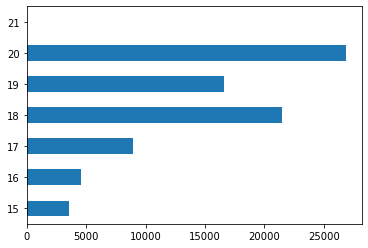

In [41]:
dt['yearsign'] = dt['AGR_DATESIGN'].apply(lambda x: int(x[-2:]))
dt.yearsign.value_counts().sort_index().plot.barh()

In [43]:
dt[['yearsign', 'CNT_CLAIM_PAY']].groupby('yearsign').sum()

,CNT_CLAIM_PAY
yearsign,
15,219
16,235
17,445
18,1301
19,806
20,1206
21,0


# План работ
Построим модель, предсказывающую вероятность убытка по параметрам договора

+ из дат подписания и начала можно получить информацию о том, насколько заранее куплен полис
+ из источника продаж, создателя, категории, марки, и популярных моделей получим среднюю убыточность по каждому из них
+ из года выпуска получим возраст машины на момент страхования
+ по каждому региону (собственника, страхователя, + по их паспортам) также получим среднюю убыточность
+ данных о регионах очень мало, но они очень важны. Попробуем заполнить недостающие данные о регионе использования ТС с помощью региона выдачи паспорта. Потом получим среднюю убыточность по региону
+ выведем отдельно признак пролонгируемого договора
+ пол закодируем в onehot, где он неизвестен (премущественно это мультидрайв) будет 0,0
+ отдельными колонками выведем общее количество водителей, минимальный и максимальный возраст, минимальный и максимальный КБМ

In [44]:
# из дат подписания и начала можно получить информацию о том, насколько заранее куплен полис

def daysbetween(d1, d2):
    dt1 = datetime.datetime.strptime(d1, '%d.%m.%y')
    dt2 = datetime.datetime.strptime(d2, '%d.%m.%y')
    return (dt2 - dt1).days

dt['f1_daysbeforestart'] = dt.apply(lambda x: daysbetween(x['AGR_DATESIGN'], x['AGR_DATEBEG']), axis=1)

In [53]:
# из источника продаж, создателя, категории, марки, и популярных моделей получим 
# среднюю убыточность по каждому из них

class claimmeansclass():
    '''
    для инициации класса необходимо передать колонку, по которой считаем убытки и тип убытка 
    (по оплаченным убыткам если pay=True и по неоплаченным если False)
    '''
    def __init__(self, col, pay):
#         min_max_scaler = preprocessing.MinMaxScaler()
        if pay == True:
            claim = 'CNT_CLAIM_PAY'
        elif pay == False:
            claim = 'CNT_CLAIM_NOT_PAY'
        mn = dt[[col, claim]].groupby(col).mean()
        sm = dt[[col, claim]].groupby(col).sum()
#         mn[claim] = min_max_scaler.fit_transform(mn[[claim]])
        self.mnsm = mn.join(sm, on=col, rsuffix = '_SUM')
        self.claim = claim
#         print(self.mnsm)


    def claimmeans(self, val, limit = 0):
        '''Функция отдаёт среднюю убыточность по колонке col для ее значения val из датафрейма df. Отдаёт среднюю убыточность по колонке col,
        если убытков для анализа меньше, чем limit'''
    #     print(mnsm)
        if self.mnsm.loc[val][1] >= limit:
            return self.mnsm.loc[val, self.claim]
        else: return self.mnsm[self.claim].mean()

In [54]:
ctype = [True, False]
ftype = ['AGR_SRC', 'AGR_CREATEDBY', 'TS_CATEGORY', 'TS_MARK_NAME', 'TS_MODEL_NAME']

for index, f in enumerate(ftype):
    i = index+2
    dt[f].fillna('Отсутствует', inplace=True)
    for c in ctype:
        name = 'f' + str(i) + '_' + f + '_' + str(c)
        cmc = claimmeansclass(f, c)
        print(f, c, name)
        dt[name] = dt.progress_apply(lambda x: cmc.claimmeans(x[f], limit=10), axis = 1)
        

  0%|                                                                              | 1/81971 [00:00<2:40:08,  8.53it/s]

AGR_SRC True f2_AGR_SRC_True


  0%|                                                                              | 1/81971 [00:00<2:27:18,  9.27it/s]

AGR_SRC False f2_AGR_SRC_False


  0%|                                                                                | 7/81971 [00:00<21:40, 63.05it/s]

AGR_CREATEDBY True f3_AGR_CREATEDBY_True


  1%|▋                                                                           | 785/81971 [00:00<1:34:51, 14.26it/s]

AGR_CREATEDBY False f3_AGR_CREATEDBY_False


  0%|                                                                              | 66/81971 [00:00<02:04, 655.67it/s]

TS_CATEGORY True f4_TS_CATEGORY_True


  0%|                                                                              | 81/81971 [00:00<01:46, 770.84it/s]

TS_CATEGORY False f4_TS_CATEGORY_False


  0%|▏                                                                           | 152/81971 [00:00<01:01, 1325.98it/s]

TS_MARK_NAME True f5_TS_MARK_NAME_True


  0%|                                                                              | 1/81971 [00:00<2:32:27,  8.96it/s]

TS_MARK_NAME False f5_TS_MARK_NAME_False


  0%|▏                                                                           | 153/81971 [00:00<01:01, 1323.57it/s]

TS_MODEL_NAME True f6_TS_MODEL_NAME_True


  0%|                                                                              | 55/81971 [00:00<02:51, 477.46it/s]

TS_MODEL_NAME False f6_TS_MODEL_NAME_False


100%|██████████████████████████████████████████████████████████████████████████| 81971/81971 [00:11<00:00, 6999.92it/s]


In [55]:
# после каждого шага сохраняем датасет. Крайняя фича - f6
dt.to_csv('../data/v2step1.csv')

In [56]:
pd.read_csv('../data/v2step1.csv').describe()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,INS_YEAR,INS_REG,OWN_YEAR,OWN_REG,AGR_KBM,TS_YEAR,TS_POWER,AGR_PREVISN,AGR_NEXTISN,...,f2_AGR_SRC_True,f2_AGR_SRC_False,f3_AGR_CREATEDBY_True,f3_AGR_CREATEDBY_False,f4_TS_CATEGORY_True,f4_TS_CATEGORY_False,f5_TS_MARK_NAME_True,f5_TS_MARK_NAME_False,f6_TS_MODEL_NAME_True,f6_TS_MODEL_NAME_False
count,81971.000000,80575.000000,79912.000000,80575.000000,80017.000000,81971.000000,81970.000000,81970.000000,1.466600e+04,1.841600e+04,...,81971.000000,81971.000000,81971.000000,81971.000000,81971.000000,81971.000000,81971.000000,81971.000000,81971.000000,81971.000000
mean,59122.881592,42.078784,44.471844,42.078784,44.462689,0.822766,2009.629084,141.943483,8.854896e+08,8.907379e+08,...,0.051384,0.109624,0.052407,0.110934,0.051358,0.109619,0.052179,0.110009,0.053021,0.113749
std,30724.884725,12.474718,20.570448,12.474718,20.597744,0.188182,6.302601,69.647682,1.561051e+07,3.332287e+06,...,0.012027,0.009038,0.016079,0.023943,0.000490,0.000692,0.013187,0.021947,0.018599,0.034331
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.500000,1900.000000,1.000000,6.130210e+08,8.866099e+08,...,0.044999,0.088991,0.020794,0.045283,0.051350,0.068290,0.028818,0.048450,0.028653,0.035211
25%,34991.500000,33.000000,36.000000,33.000000,36.000000,0.700000,2007.000000,101.000000,8.867324e+08,8.878816e+08,...,0.044999,0.111105,0.039501,0.096539,0.051350,0.109630,0.045707,0.105747,0.046864,0.096667
50%,61914.000000,40.000000,45.000000,40.000000,45.000000,0.850000,2011.000000,123.000000,8.873140e+08,8.897757e+08,...,0.049135,0.111105,0.052995,0.109162,0.051350,0.109630,0.047876,0.111323,0.046864,0.106392
75%,86117.500000,50.000000,57.000000,50.000000,58.000000,0.950000,2014.000000,163.000000,8.881884e+08,8.935231e+08,...,0.049135,0.115625,0.060503,0.117674,0.051350,0.109630,0.055138,0.124068,0.055848,0.134694
max,107080.000000,95.000000,99.000000,95.000000,99.000000,2.450000,2020.000000,1999.000000,8.916464e+08,8.976840e+08,...,0.085897,0.115967,0.107527,0.272727,0.080609,0.109630,0.123377,0.233129,0.219178,0.384615


In [57]:
dt.TS_CATEGORY.value_counts()

Категория "B"    81948
Категория "C"       21
Категория "D"        2
Name: TS_CATEGORY, dtype: int64

In [58]:
# из года выпуска получим возраст машины на момент страхования


dt['f7_car_age_on_start'] = dt.apply(lambda x: datetime.datetime.strptime(x['AGR_DATEBEG'], '%d.%m.%y').year - x['TS_YEAR'], axis=1)

In [59]:
# По каждому региону (собственника, страхователя, + по их паспортам) также получим среднюю убыточность
dt['INS_DOCSER'] = dt['INS_DOCSER'].apply(lambda x: str(x)[:2])
dt['OWN_DOCSER'] = dt['OWN_DOCSER'].apply(lambda x: str(x)[:2])

In [60]:
dt['INS_DOCSER'].fillna(0, inplace=True)
dt['OWN_DOCSER'].fillna(0, inplace=True)

In [61]:
def intdocser(docser):
    try:
        return int(docser)
    except:
        return 0

In [62]:
dt['INS_DOCSER'] = dt['INS_DOCSER'].apply(intdocser)
dt['OWN_DOCSER'] = dt['OWN_DOCSER'].apply(intdocser)

In [64]:
dt.groupby('OWN_DOCSER').count().sort_index()

,AGR_DATESIGN,AGR_DATEBEG,AGR_DATEEND,AGR_SRC,AGR_CREATEDBY,INS_NAME,INS_SEX,INS_YEAR,INS_REG,INS_DOCSER,...,f2_AGR_SRC_False,f3_AGR_CREATEDBY_True,f3_AGR_CREATEDBY_False,f4_TS_CATEGORY_True,f4_TS_CATEGORY_False,f5_TS_MARK_NAME_True,f5_TS_MARK_NAME_False,f6_TS_MODEL_NAME_True,f6_TS_MODEL_NAME_False,f7_car_age_on_start
OWN_DOCSER,,,,,,,,,,,,,,,,,,,,,
0,1449,1449,1449,1449,1449,1449,67,70,1406,1449,...,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449
1,252,252,252,252,252,252,252,252,248,252,...,252,252,252,252,252,252,252,252,252,252
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3377,3377,3377,3377,3377,3377,3373,3377,3309,3377,...,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377
4,946,946,946,946,946,946,944,946,923,946,...,946,946,946,946,946,946,946,946,946,946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,55,55,55,55,55,55,55,55,54,55,...,55,55,55,55,55,55,55,55,55,55
96,795,795,795,795,795,795,792,795,793,795,...,795,795,795,795,795,795,795,795,795,795
97,190,190,190,190,190,190,190,190,184,190,...,190,190,190,190,190,190,190,190,190,190


In [66]:
# создадим регион 0 для тех, у кого он не определен
dt['OWN_REG'].fillna(0, inplace=True)
dt['INS_REG'].fillna(0, inplace=True)
dt.groupby('OWN_REG').sum()

,INS_YEAR,INS_REG,INS_DOCSER,OWN_YEAR,OWN_DOCSER,AGR_KBM,TS_YEAR,TS_POWER,AGR_PREVISN,AGR_NEXTISN,...,f2_AGR_SRC_False,f3_AGR_CREATEDBY_True,f3_AGR_CREATEDBY_False,f4_TS_CATEGORY_True,f4_TS_CATEGORY_False,f5_TS_MARK_NAME_True,f5_TS_MARK_NAME_False,f6_TS_MODEL_NAME_True,f6_TS_MODEL_NAME_False,f7_car_age_on_start
OWN_REG,,,,,,,,,,,,,,,,,,,,,
0.0,75887.0,3557.0,82093,75887.0,82093,1551.25,3929228.0,291538.33,4.305108e+11,6.544938e+11,...,216.051015,99.781334,224.812771,100.366448,214.176651,97.166266,224.222662,98.874173,229.214997,15436.0
1.0,6468.0,430.0,1038,6468.0,1038,141.65,316505.0,18326.50,5.327247e+09,6.230082e+09,...,18.090483,11.905650,18.621492,8.113243,17.321619,8.416555,17.053036,8.339376,18.320408,2343.0
3.0,137179.0,12549.0,33053,137179.0,33053,2810.05,6675635.0,400845.79,3.648006e+11,4.646965e+11,...,364.689418,172.494650,367.832306,170.664101,364.260802,176.382383,363.588369,181.865700,380.221387,31746.0
4.0,36916.0,3742.0,8029,36916.0,8029,691.85,1778699.0,119671.94,7.986891e+09,2.591112e+10,...,101.513879,46.736758,108.484733,45.444428,97.022990,47.011256,95.998808,47.745319,101.678077,8683.0
5.0,123379.0,14566.0,18076,123379.0,18076,2243.95,5690359.0,423712.53,3.964323e+11,4.863234e+11,...,299.310967,158.997641,310.131737,145.781618,311.240982,136.766107,316.657133,139.919950,313.818124,37625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,1676.0,3465.0,2659,1676.0,2659,32.20,76224.0,4282.60,8.885790e+08,8.909624e+08,...,4.384913,2.913702,4.513535,1.951286,4.165959,1.998186,4.068711,2.112220,4.356450,472.0
96.0,34142.0,76713.0,72156,34142.0,72156,761.10,1621964.0,90090.72,3.552837e+09,3.563756e+09,...,93.353306,61.085712,93.369982,41.490506,88.581442,51.854526,71.634260,54.106760,79.938856,8588.0
97.0,3277.0,9708.0,9178,3277.0,9178,95.80,203094.0,11865.05,1.065027e+10,1.335459e+10,...,11.299204,6.805887,12.076561,5.186313,11.072680,4.980042,11.500170,5.740794,12.436254,700.0


In [67]:
rtype = ['OWN_REG', 'INS_REG', 'INS_DOCSER', 'OWN_DOCSER']

for index, f in enumerate(rtype):
    i = index+9
    for c in ctype:
        name = 'f' + str(i) + '_' + f + '_' + str(c)
        cmc = claimmeansclass(f, c)
        print(f, c, name)
        dt[name] = dt.progress_apply(lambda x: cmc.claimmeans(x[f], limit=10), axis = 1)

  0%|                                                                              | 1/81971 [00:00<2:38:21,  8.63it/s]

OWN_REG True f9_OWN_REG_True


  0%|                                                                              | 58/81971 [00:00<02:37, 518.67it/s]

OWN_REG False f9_OWN_REG_False


  0%|                                                                                | 8/81971 [00:00<19:45, 69.17it/s]

INS_REG True f10_INS_REG_True


  0%|                                                                              | 1/81971 [00:00<2:19:27,  9.80it/s]

INS_REG False f10_INS_REG_False


  0%|                                                                              | 1/81971 [00:00<2:26:18,  9.34it/s]

INS_DOCSER True f11_INS_DOCSER_True


  0%|                                                                              | 2/81971 [00:00<1:09:15, 19.72it/s]

INS_DOCSER False f11_INS_DOCSER_False


  1%|▊                                                                           | 917/81971 [00:00<1:34:41, 14.27it/s]

OWN_DOCSER True f12_OWN_DOCSER_True


  0%|                                                                              | 1/81971 [00:00<2:17:07,  9.96it/s]

OWN_DOCSER False f12_OWN_DOCSER_False


100%|██████████████████████████████████████████████████████████████████████████| 81971/81971 [00:10<00:00, 7914.63it/s]


In [68]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81971 entries, 1 to 107080
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGR_DATESIGN            81971 non-null  object 
 1   AGR_DATEBEG             81971 non-null  object 
 2   AGR_DATEEND             81971 non-null  object 
 3   AGR_SRC                 81971 non-null  object 
 4   AGR_CREATEDBY           81971 non-null  object 
 5   INS_NAME                81971 non-null  object 
 6   INS_SEX                 80480 non-null  object 
 7   INS_YEAR                80575 non-null  float64
 8   INS_REG                 81971 non-null  float64
 9   INS_DOCSER              81971 non-null  int64  
 10  OWN_NAME                81971 non-null  object 
 11  OWN_SEX                 80480 non-null  object 
 12  OWN_YEAR                80575 non-null  float64
 13  OWN_REG                 81971 non-null  float64
 14  OWN_DOCSER              81971 non-nul

In [24]:
# dt['f13_own_is_ins'] = dt.apply(lambda x: 1 if x['INS_NAME'] == x['OWN_NAME'] else 0, axis=1)

In [69]:
# после каждого шага сохраняем датасет. Крайняя фича - f13
dt.to_csv('../data/v2step2.csv')

In [70]:
# КБМ по договорам с юрлицами отсутствует, заполним его медианой КБМ по другим договорам
dt['AGR_KBM'].fillna(dt['AGR_KBM'].median(), inplace=True)
dt.AGR_KBM.unique()

array([0.85, 0.8 , 1.  , 0.75, 0.95, 0.7 , 0.9 , 0.65, 0.6 , 0.5 , 0.55,
       1.4 , 1.55, 2.45, 2.3 , 1.04])

In [71]:
# выведем отдельно признак пролонгируемого договора
dt['f14_is_prolongation'] = dt['AGR_PREVISN'].apply(lambda x: 1 if x>0 else 0)

In [72]:
dt.f14_is_prolongation.unique()

array([1, 0], dtype=int64)

In [73]:
# пол, цель использования, категорию, и тип ТС закодируем в onehot, где он неизвестен (премущественно это мультидрайв) будет 0,0
one_hot = pd.get_dummies(dt[['OWN_SEX', 'INS_SEX', 'TS_CATEGORY', 'TS_USE_NAME']])
dt = dt.join(one_hot)

In [74]:
# после каждого шага сохраняем датасет. Крайняя фича - f14
dt.to_csv('../data/v2step3.csv')
pd.read_csv('../data/v2step3.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81971 entries, 0 to 81970
Data columns (total 81 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     81971 non-null  int64  
 1   AGR_DATESIGN                                   81971 non-null  object 
 2   AGR_DATEBEG                                    81971 non-null  object 
 3   AGR_DATEEND                                    81971 non-null  object 
 4   AGR_SRC                                        81971 non-null  object 
 5   AGR_CREATEDBY                                  81971 non-null  object 
 6   INS_NAME                                       81971 non-null  object 
 7   INS_SEX                                        80480 non-null  object 
 8   INS_YEAR                                       80575 non-null  float64
 9   INS_REG                                        819

In [75]:
# отдельными колонками выведем общее количество водителей
dt['DRV_ISN'].fillna(0, inplace=True)
dt['f15_drivers_count'] = dt['DRV_ISN'].apply(lambda x: 0 if x == 0 else len(str(x).split(',')))
dt.f15_drivers_count.unique()

array([ 3,  5,  4,  1,  2,  0,  6,  7,  8,  9, 19, 18, 10, 11, 12, 15, 13,
       16, 17], dtype=int64)

In [78]:
dt.groupby('f15_drivers_count').count()

,AGR_DATESIGN,AGR_DATEBEG,AGR_DATEEND,AGR_SRC,AGR_CREATEDBY,INS_NAME,INS_SEX,INS_YEAR,INS_REG,INS_DOCSER,...,"TS_CATEGORY_Категория ""C""","TS_CATEGORY_Категория ""D""",TS_USE_NAME_Дорожные и специальные ТС,TS_USE_NAME_Личная,TS_USE_NAME_Перевозка опасных грузов,TS_USE_NAME_Прокат или краткосрочная аренда,TS_USE_NAME_Прочее,TS_USE_NAME_Регулярные пассажирские перевозки,"TS_USE_NAME_Такси, Маршрутное такси",TS_USE_NAME_Учебная езда
f15_drivers_count,,,,,,,,,,,,,,,,,,,,,
0,6216,6216,6216,6216,6216,6216,6059,6091,6216,6216,...,6216,6216,6216,6216,6216,6216,6216,6216,6216,6216
1,31603,31603,31603,31603,31603,31603,31108,31151,31603,31603,...,31603,31603,31603,31603,31603,31603,31603,31603,31603,31603
2,27915,27915,27915,27915,27915,27915,27465,27476,27915,27915,...,27915,27915,27915,27915,27915,27915,27915,27915,27915,27915
3,10738,10738,10738,10738,10738,10738,10486,10492,10738,10738,...,10738,10738,10738,10738,10738,10738,10738,10738,10738,10738
4,4190,4190,4190,4190,4190,4190,4089,4090,4190,4190,...,4190,4190,4190,4190,4190,4190,4190,4190,4190,4190
5,939,939,939,939,939,939,912,914,939,939,...,939,939,939,939,939,939,939,939,939,939
6,236,236,236,236,236,236,230,230,236,236,...,236,236,236,236,236,236,236,236,236,236
7,75,75,75,75,75,75,72,72,75,75,...,75,75,75,75,75,75,75,75,75,75
8,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


In [79]:
def minmaxfunc(x):
    l = str(x).split(',')
    lf = [float(i) for i in l]
    return lf

minmaxfunc('1,3,4,5')

[1.0, 3.0, 4.0, 5.0]

In [80]:
# отдельными колонками выведем минимальный и максимальный возраст, стаж, и КБМ 
# (КБМ только мин, макс и так в договоре есть)
dt['DRV_KBM'].fillna(dt['AGR_KBM'].median(), inplace=True)
dt['f23_kbm_min'] = dt['DRV_KBM'].apply(lambda x: min(minmaxfunc(x)))

In [89]:
dt['f17_drv_age_min'] = dt['DRV_YEAR'].apply(lambda x: min(minmaxfunc(x)))
dt['f18_drv_age_max'] = dt['DRV_YEAR'].apply(lambda x: max(minmaxfunc(x)))
dt['f19_drv_skill_min'] = dt['DRV_SKILL'].apply(lambda x: min(minmaxfunc(x)))
dt['f20_drv_skill_max'] = dt['DRV_SKILL'].apply(lambda x: max(minmaxfunc(x)))

In [82]:
# дополнительно выведем информацию о том, что собственник = страхователю и он же водит

def oneperson(s):
    if s['INS_NAME'] == s['OWN_NAME'] and s['OWN_NAME'] in str(s['DRV_NAME']).split(','):
        return 1
    else:
        return 0

In [83]:
dt['f21_oneperson'] = dt.apply(oneperson, axis=1)

In [84]:
# забыл вывести длительность договора
dt['f22_agr_days'] = dt.apply(lambda x: daysbetween(x['AGR_DATEBEG'], x['AGR_DATEEND']), axis=1)

In [85]:
# после каждого шага сохраняем датасет. Крайняя фича - f20
dt.to_csv('../data/v2step4.csv')

In [86]:
dt['claim'] = dt['CNT_CLAIM_PAY'].apply(lambda x: 0 if x == 0 else 1)

In [88]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81971 entries, 1 to 107080
Data columns (total 87 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   AGR_DATESIGN                                   81971 non-null  object 
 1   AGR_DATEBEG                                    81971 non-null  object 
 2   AGR_DATEEND                                    81971 non-null  object 
 3   AGR_SRC                                        81971 non-null  object 
 4   AGR_CREATEDBY                                  81971 non-null  object 
 5   INS_NAME                                       81971 non-null  object 
 6   INS_SEX                                        80480 non-null  object 
 7   INS_YEAR                                       81971 non-null  float64
 8   INS_REG                                        81971 non-null  float64
 9   INS_DOCSER                                     81

In [90]:
dt['INS_YEAR'].fillna(dt['INS_YEAR'].median(), inplace=True)
dt['OWN_YEAR'].fillna(dt['OWN_YEAR'].median(), inplace=True)
dt['f19_drv_skill_min'].fillna(dt['INS_YEAR'].median(), inplace=True)
dt['f19_drv_skill_min'].fillna(dt['OWN_YEAR'].median(), inplace=True)
dt['f17_drv_age_min'].fillna(dt['f17_drv_age_min'].median(), inplace=True)
dt['f18_drv_age_max'].fillna(dt['f18_drv_age_max'].median(), inplace=True)
dt['f19_drv_skill_min'].fillna(dt['f19_drv_skill_min'].median(), inplace=True)
dt['f20_drv_skill_max'].fillna(dt['f20_drv_skill_max'].median(), inplace=True)

In [91]:
print(dt.columns)

Index(['AGR_DATESIGN', 'AGR_DATEBEG', 'AGR_DATEEND', 'AGR_SRC',
       'AGR_CREATEDBY', 'INS_NAME', 'INS_SEX', 'INS_YEAR', 'INS_REG',
       'INS_DOCSER', 'OWN_NAME', 'OWN_SEX', 'OWN_YEAR', 'OWN_REG',
       'OWN_DOCSER', 'DRV_NAME', 'DRV_SEX', 'DRV_YEAR', 'DRV_DOCSER',
       'DRV_KBM', 'DRV_SKILL', 'AGR_KBM', 'DRV_ISN', 'TS_CATEGORY',
       'TS_MARK_NAME', 'TS_MODEL_NAME', 'TS_YEAR', 'TS_VIN', 'TS_POWER',
       'TS_REGNO', 'TS_USE_NAME', 'TS_DOC', 'TS_DOC_SER_NO', 'AGR_PREVISN',
       'AGR_NEXTISN', 'CNT_CLAIM_NOT_PAY', 'CNT_CLAIM_PAY',
       'SUM_CLAIM_NOT_PAY', 'SUM_CLAIM_PAY', 'CNT_PVU_NOT_PAY', 'CNT_PVU_PAY',
       'SUM_PVU_NOT_PAY', 'SUM_PVU_PAY', 'f1_daysbeforestart', 'yearsign',
       'f2_AGR_SRC_True', 'f2_AGR_SRC_False', 'f3_AGR_CREATEDBY_True',
       'f3_AGR_CREATEDBY_False', 'f4_TS_CATEGORY_True', 'f4_TS_CATEGORY_False',
       'f5_TS_MARK_NAME_True', 'f5_TS_MARK_NAME_False',
       'f6_TS_MODEL_NAME_True', 'f6_TS_MODEL_NAME_False',
       'f7_car_age_on_start', 'f9

In [92]:
data = dt[['AGR_SRC',
       'INS_YEAR', 'OWN_YEAR', 'AGR_KBM', 'TS_POWER', 'f1_daysbeforestart', 'yearsign',
       'f2_AGR_SRC_True', 'f2_AGR_SRC_False', 'f3_AGR_CREATEDBY_True',
       'f3_AGR_CREATEDBY_False', 'f4_TS_CATEGORY_True', 'f4_TS_CATEGORY_False',
       'f5_TS_MARK_NAME_True', 'f5_TS_MARK_NAME_False',
       'f6_TS_MODEL_NAME_True', 'f6_TS_MODEL_NAME_False',
       'f7_car_age_on_start', 'f9_OWN_REG_True', 'f9_OWN_REG_False',
       'f10_INS_REG_True', 'f10_INS_REG_False', 'f11_INS_DOCSER_True',
       'f11_INS_DOCSER_False', 'f12_OWN_DOCSER_True', 'f12_OWN_DOCSER_False',
       'f14_is_prolongation', 'OWN_SEX_Ж', 'OWN_SEX_М', 'INS_SEX_Ж',
       'INS_SEX_М', 'TS_CATEGORY_Категория "B"', 'TS_CATEGORY_Категория "C"',
       'TS_CATEGORY_Категория "D"', 'TS_USE_NAME_Дорожные и специальные ТС',
       'TS_USE_NAME_Личная', 'TS_USE_NAME_Перевозка опасных грузов',
       'TS_USE_NAME_Прокат или краткосрочная аренда', 'TS_USE_NAME_Прочее',
       'TS_USE_NAME_Регулярные пассажирские перевозки',
       'TS_USE_NAME_Такси, Маршрутное такси', 'TS_USE_NAME_Учебная езда',
       'f15_drivers_count', 'f23_kbm_min', 'f17_drv_age_min',
       'f18_drv_age_max', 'f21_oneperson', 'f22_agr_days', 'claim',
       'f19_drv_skill_min', 'f20_drv_skill_max']]

data.head(20)

,AGR_SRC,INS_YEAR,OWN_YEAR,AGR_KBM,TS_POWER,f1_daysbeforestart,yearsign,f2_AGR_SRC_True,f2_AGR_SRC_False,f3_AGR_CREATEDBY_True,...,TS_USE_NAME_Учебная езда,f15_drivers_count,f23_kbm_min,f17_drv_age_min,f18_drv_age_max,f21_oneperson,f22_agr_days,claim,f19_drv_skill_min,f20_drv_skill_max
1,КИАС:Страхование,49.0,49.0,0.85,156.4,3,15,0.049135,0.111105,0.050685,...,0,3,0.85,29.0,51.0,0,364,0,10.0,28.0
2,КИАС:Страхование,52.0,52.0,0.80,235.0,5,15,0.049135,0.111105,0.050685,...,0,5,0.70,30.0,52.0,1,365,0,11.0,29.0
3,КИАС:Страхование,52.0,52.0,0.80,235.0,5,15,0.049135,0.111105,0.041509,...,0,4,0.80,30.0,52.0,1,365,0,11.0,29.0
4,КИАС:Страхование,50.0,50.0,1.00,156.4,6,16,0.049135,0.111105,0.050685,...,0,4,0.80,23.0,52.0,0,365,0,0.0,29.0
5,КИАС:Страхование,53.0,53.0,0.75,235.0,10,16,0.049135,0.111105,0.047490,...,0,5,0.70,31.0,53.0,1,364,0,12.0,30.0
6,КИАС:Страхование,51.0,51.0,0.95,156.4,2,17,0.049135,0.111105,0.055940,...,0,4,0.75,24.0,53.0,0,364,0,1.0,30.0
7,КИАС:Страхование,51.0,51.0,0.95,156.4,2,17,0.049135,0.111105,0.047490,...,0,4,0.75,24.0,53.0,0,364,0,1.0,30.0
8,КИАС:Страхование,54.0,54.0,0.70,235.0,4,17,0.049135,0.111105,0.047490,...,0,5,0.65,32.0,54.0,1,364,0,13.0,31.0
9,КИАС:Страхование,52.0,52.0,0.90,156.4,17,18,0.049135,0.111105,0.040018,...,0,4,0.70,25.0,54.0,0,364,0,2.0,31.0
10,КИАС:Страхование,55.0,55.0,0.65,235.0,12,18,0.049135,0.111105,0.047490,...,0,5,0.60,33.0,55.0,1,364,0,14.0,32.0


In [93]:
one_hot = pd.get_dummies(data['AGR_SRC'])
data = data.join(one_hot)

In [94]:
data.drop('AGR_SRC', axis=1, inplace = True)

In [96]:
# сохраним итоговый вариант
data = data.dropna()
data.to_csv('../data/model2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81970 entries, 1 to 107080
Data columns (total 56 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   INS_YEAR                                       81970 non-null  float64
 1   OWN_YEAR                                       81970 non-null  float64
 2   AGR_KBM                                        81970 non-null  float64
 3   TS_POWER                                       81970 non-null  float64
 4   f1_daysbeforestart                             81970 non-null  int64  
 5   yearsign                                       81970 non-null  int64  
 6   f2_AGR_SRC_True                                81970 non-null  float64
 7   f2_AGR_SRC_False                               81970 non-null  float64
 8   f3_AGR_CREATEDBY_True                          81970 non-null  float64
 9   f3_AGR_CREATEDBY_False                         81